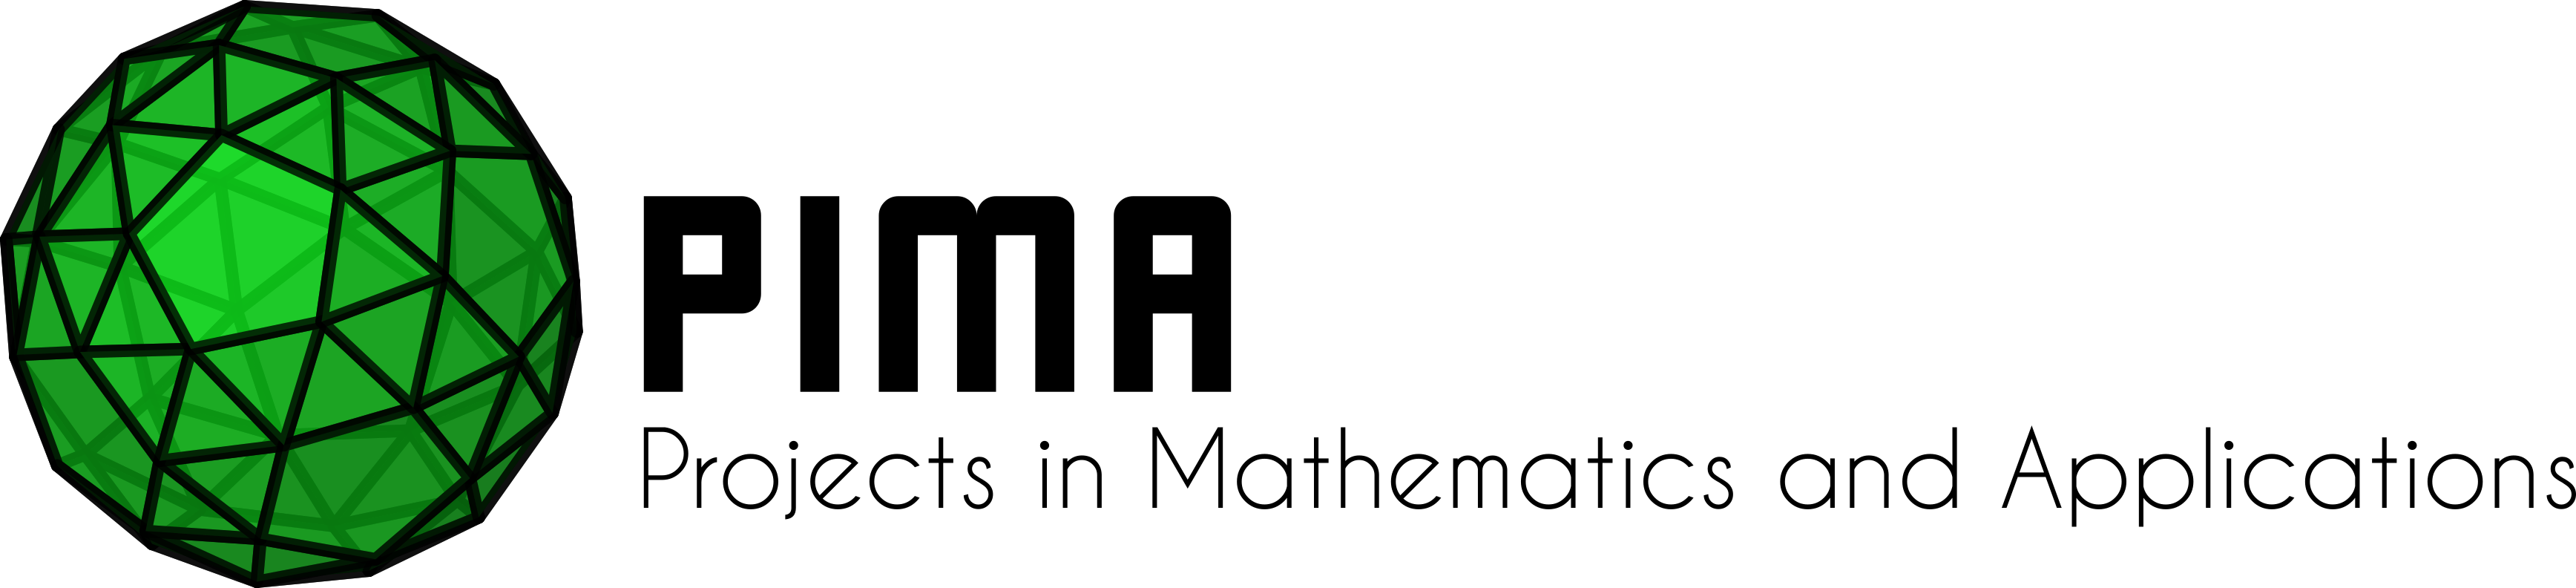

# Chuẩn bị trình chấm bài và thông tin học viên

In [1]:
import shutil
import subprocess
import sys

# Clean up old folders if they exist
shutil.rmtree("PiMA-GenAI-Grader", ignore_errors=True)
shutil.rmtree("grader_homework_2", ignore_errors=True)

# Clone the GitHub repo
subprocess.run(["git", "clone", "https://github.com/vongvinhtoan/PiMA-GenAI-Grader.git"], check=True)

# Move the folder
shutil.move("PiMA-GenAI-Grader/grader_homework_2", "./grader_homework_2")

# Install requirements
subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "./grader_homework_2/requirements.txt", "--quiet"])

print("")

Cloning into 'PiMA-GenAI-Grader'...



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
student_id = 42

In [3]:
import grader_homework_2 as pima_grader
pima_grader.GradingOptimizer.optimize_for_final_grading(False)

# Import các thư viện

In [4]:
from typing import *
import random
import numpy as np

In [5]:
TypeQ = TypeVar("TypeQ")  # Kiểu dữ liệu của các mẫu trong phân phối
TypeP = TypeVar("TypeP")  # Kiểu dữ liệu trả về của hàm f

# Giới thiệu bài tập

Trong bài tập về nhà lập trình tuần này, chúng ta sẽ sử dụng ngôn ngữ lập trình Python để thực hiện một số vấn đề về suy diễn. Suy diễn trong khuôn khổ bài tập này xoay quanh việc thực hiện các phân tích xung quanh việc tính và tính:
$$
\mathbb E_q[f(x)] = \int f(x)q(x)dx
$$
với $q(\cdot)$ là một hàm mật độ xác suất gán với biến ngẫu nhiên $x$.

Trong Notebook này sẽ xuất hiện các dòng code chú thích bắt đầu bằng cụm từ `TODO` kèm theo yêu cầu, nhiệm vụ của bạn là hoàn thành các yêu cầu đó.

Bài tập đã cho sẵn các bạn code mẫu cho `xấp xỉ Monte Carlo` cùng với đoạn code sử dụng để ước lượng số $\pi$. Khi nhắc đến việc xấp xỉ/ước lượng số $\pi$ trong bài tập này, ta sẽ chỉ xét đến việc xấp xỉ:
$$
  \pi = 4 \mathbb E_q[f(\mathbf x)]
$$
với:
- $r$ là bán kính hình tròn và nửa độ dài cạnh hình vuông ngoại tiếp đường tròn.
- $\mathbf x$ là một biến ngẫu nhiên 2 chiều thuộc $[-r; r] \times [-r; r]$.
- $q(\mathbf x)$ là hàm phân phối xác suất đều trên $[-r; r] \times [-r; r]$.
- $f(\mathbf x) = \begin{cases}
  1, & |\mathbf x| \le r\\
  0, & \text{else}
\end{cases}$

Bài tập về nhà lập trình tuần có **4** bài tập.

## Code mẫu Monte Carlo và ước lượng số $\pi$

In [6]:
def MonteCarlo(
    q_sampler: Callable[[], TypeQ],
    f: Callable[[TypeQ], TypeP],
    N: int
) -> TypeP:
    """
    Hàm ước lượng trung bình của mẫu P không biết thông qua mẫu Q đã biết.

    Parameters:
    - q_sampler: Hàm lấy mẫu ngẫu nhiên từ phân phối Q.
    - f: Hàm ánh xạ từ không gian mẫu của Q sang P.
    - N: Số lượng mẫu để lấy.

    Returns:
    - Giá trị ước lượng trung bình của mẫu P.
    """

    samples = [q_sampler() for _ in range(N)]
    return 1/N * sum(f(x) for x in samples)

In [7]:
def sample_in_square(r: float) -> Callable[[], tuple[float, float]]:
    """Sinh ngẫu nhiên theo phân phối đều trong hình vuông [-r,r] × [-r,r]."""

    def sampler() -> tuple[float, float]:
        x = random.uniform(-r, r)
        y = random.uniform(-r, r)
        return x, y

    return sampler

In [8]:
def is_in_circle(r: float) -> Callable[[tuple[float, float]], int]:
    """Hàm trả về 1 nếu điểm nằm trong đường tròn bán kính r"""

    def f(p: tuple[float, float]) -> int:
        x, y = p
        return 1 if x**2 + y**2 <= r**2 else 0

    return f

In [9]:
def approx_pi_monte_carlo(r: float, N: int) -> float:
    """Hàm xấp xỉ số pi bằng Monte Carlo"""

    def approx_func() -> float:
        return 4 * MonteCarlo(
            q_sampler = sample_in_square(r = r),
            f = is_in_circle(r = r),
            N = N
        )

    return approx_func

## Thực hiện 10000 lần xấp xỉ $\pi$ bằng Monte Carlo với số lượng mẫu 50

Thực hiện xấp xỉ π bằng Monte Carlo: 100%|██████████| 10000/10000 [00:01<00:00, 7606.55it/s]


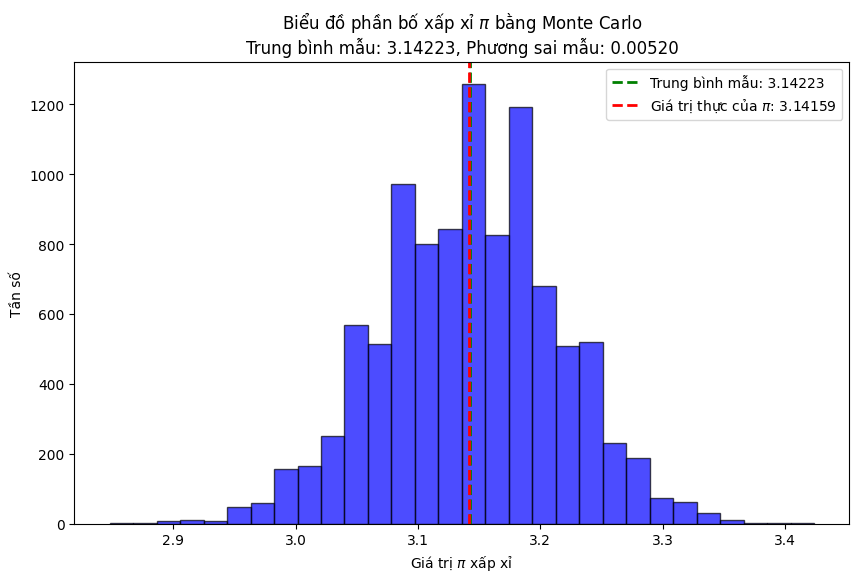

In [10]:
pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = approx_pi_monte_carlo(r = 1, N = 500),
    tqdm_desc = 'Thực hiện xấp xỉ π bằng Monte Carlo',
    var_name = '$\\pi$',
    true_value = np.pi,
    method_name = 'Monte Carlo',
    num_trials = 10000
)

# Bài tập 1

Hãy hoàn thành hàm tạo mẫu (`sampler`) cùng hàm chuyển đổi phân phối (`is_lie_across/f`) để ước lượng xác suất đáp án cho bài toán Buffon's needle.

<div style='background-color: #e6f7ff; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #1890ff;'>    
    <h3 style='margin: 0; color: #1890ff;'>ℹ️ Thông tin</h3>
    <p>Để tìm hiểu định nghĩa và ý nghĩa của bài toán <b>Buffon's needle</b>, bạn có thể tham khảo tại trang
        <a href='https://en.wikipedia.org/wiki/Buffon%27s_needle_problem' target='_blank'>Wikipedia - Buffon's needle problem</a>.
    </p>
</div>


In [11]:
import random
import math

def sample_needle(l: float, t: float) -> Callable[[], Any]:
    """Sinh ngẫu nhiên cấu hình thả ngẫu nhiên cây kim độ dài l vào tấm gỗ với các dải độ rộng t"""

    def sampler() -> Any:
        """Trả về cặp khoảng cách từ tâm cây kim đến dải gần nhất và góc giữa cây kim và dải"""
        # Sinh ngẫu nhiên khoảng cách từ tâm cây kim đến dải gần nhất
        d = random.uniform(0, t / 2)
        # Sinh ngẫu nhiên góc giữa cây kim và dải
        theta = random.uniform(0, math.pi / 2)
        return (d, theta)

    return sampler

In [12]:
import math

def is_lie_across(l: float, t: float) -> Callable[[Tuple[float, float]], int]:
    """Hàm trả về 1 nếu cấu hình biến ngẫu nhiên cho biết cây kim nằm giữa 2 dải"""

    def f(p: Tuple[float, float]) -> int:
        """Kiểm tra xem cây kim có nằm giữa 2 dải hay không"""
        d, theta = p  # Unpack the tuple p into d and theta
        return int(d < (l / 2) * math.sin(theta))  # Return 1 if the needle lies across, 0 otherwise

    return f

In [13]:
def approx_buffon_needle_monte_carlo(l: float, t: float, N: int) -> float:
    """Hàm xấp xỉ số pi bằng Monte Carlo"""

    def approx_func() -> float:
        return MonteCarlo(
            q_sampler = sample_needle(l, t),
            f = is_lie_across(l, t),
            N = N
        )

    return approx_func

Thực hiện xấp xỉ Buffon Needle bằng Monte Carlo: 100%|██████████| 10000/10000 [00:01<00:00, 7665.60it/s]


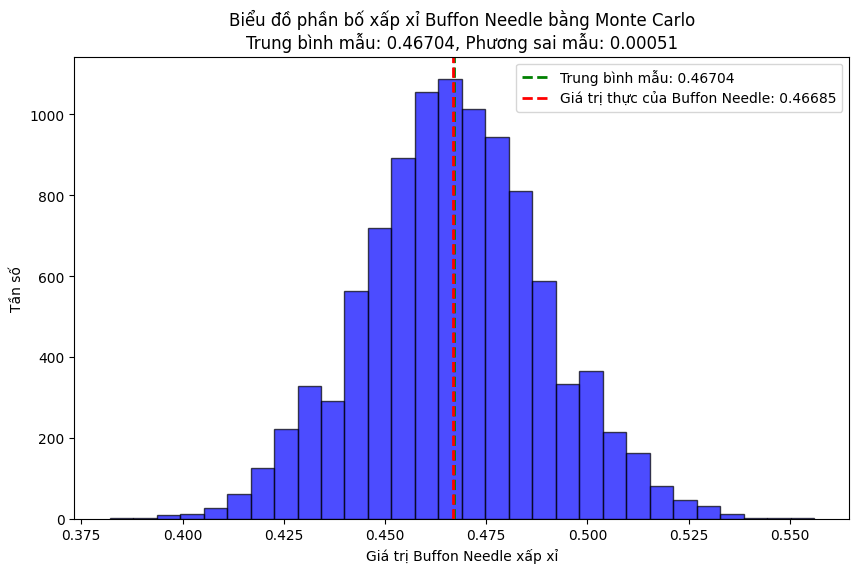

In [14]:
l = 11
t = 15

pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = approx_buffon_needle_monte_carlo(l = l, t = t, N = 500),
    tqdm_desc = 'Thực hiện xấp xỉ Buffon Needle bằng Monte Carlo',
    var_name = 'Buffon Needle',
    true_value = 2 * l / np.pi / t,
    method_name = 'Monte Carlo',
    num_trials = 10000
)

# Bài tập 2
Hoàn tất quy trình cho Importance Sampling

In [15]:
def ImportanceSampling(
    q: Callable[[TypeQ], float],
    q_star: Callable[[TypeQ], float],
    q_star_sampler: Callable[[], TypeQ],
    f: Callable[[TypeQ], TypeP],
    N: int
) -> TypeP:
    """
    Hàm ước lượng trung bình của mẫu P không biết thông qua mẫu Q đã biết bằng
    phương pháp lấy mẫu quan trọng.

    Parameters:
    - q: Hàm mật độ xác suất của phân phối mục tiêu q.
    - q_star: Hàm mật độ xác suất của phân phối đề xuất q*.
    - q_star_sampler: Hàm lấy mẫu từ phân phối q*.
    - f: Hàm ánh xạ từ không gian mẫu của Q và Q* sang P.
    - N: Số lượng mẫu để lấy.

    Returns:
    - Giá trị ước lượng trung bình của mẫu P.
    """
    total = 0.0
    for _ in range(N):
        # Lấy mẫu từ phân phối đề xuất q*
        sample = q_star_sampler()
        # Tính trọng số importance = q(x)/q*(x)
        weight = q(sample) / q_star(sample)
        # Cộng giá trị f(sample) nhân với trọng số
        total += f(sample) * weight

    # Trả về trung bình của tổng
    return total / N

# Bài tập 3
Cho trước phân phối $Q^*$ dưới dạng sampler, hãy tìm $q^*(x)$ (và $q(x)$), sau đó nhận xét về lựa chọn $Q^*$ được cho trước.

In [16]:
def sampling_IS(r: float) -> Callable[[], tuple[float, float]]:
    """Hàm lấy mẫu từ phân phối Q* cho trước"""

    def sampler() -> tuple[float, float]:
        k = random.uniform(0, r)
        x = random.uniform(-k, k)
        y = random.uniform(-k, k)
        return x, y

    return sampler

<div style='background-color: #fff8dc; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid orange;'>    
    <h3 style='margin: 0; color: orange;'>💡 Gợi ý: Áp dụng xác suất có điều kiện</h2>
    <p>Hãy suy nghĩ đến việc sử dụng các kiến thức về <b>xác suất có điều kiện</b> để tìm ra lời giải:</p>
<span>

\begin{align}
k &\sim \text{Unif}(0, r)\\
x, y &\sim \text{Unif}(-k, k)\\
p(k) &= \begin{cases}\frac{1}{r}, & k \in [0; r] \\ 0, & \text{else}\end{cases}\\
p(x, y|k) &= \begin{cases}\frac{1}{(2k)^2}, & (x, y) \in [-k; k] \times [-k; k]\\ 0, & \text{else}\end{cases}
\end{align}
</span>
</div>

In [17]:
def in_square_pdf(r: float) -> Callable[[tuple[float, float]], float]:
    """Hàm này tương đương với hàm q(x)"""

    def f(p: tuple[float, float]) -> float:
        x, y = p
        # Check if point (x, y) is inside the square [-r, r] × [-r, r]
        if abs(x) <= r and abs(y) <= r:
            # Uniform PDF: 1 / area of square = 1 / (2r * 2r)
            return 1.0 / (4 * r * r)
        return 0.0

    return f

In [18]:
def pdf_IS(r: float) -> Callable[[tuple[float, float]], float]:
    """Hàm này tương đương với hàm q*(x)"""

    def f(p: tuple[float, float]) -> float:
        x, y = p
        # Check if point is inside [-r, r] × [-r, r]
        if abs(x) <= r and abs(y) <= r:
            m = max(abs(x), abs(y))
            # Avoid division by zero at m=0 (i.e., x=0, y=0)
            if m == 0:
                # Approximation for small m
                return (r - 0) / (4 * r**2 * 0.001)
            return (r - m) / (4 * r**2 * m)
        return 0.0

    return f

In [19]:
def approx_pi_IS(r: float, N: int) -> float:
    """Hàm xấp xỉ số pi bằng Importance Sampling"""

    def approx_func() -> float:
        return 4 * ImportanceSampling(
            q_star_sampler = sampling_IS(r = r),
            q = in_square_pdf(r = r),
            q_star = pdf_IS(r = r),
            f = is_in_circle(r = r),
            N = N
        )

    return approx_func

Thực hiện xấp xỉ π bằng Monte Carlo: 100%|██████████| 10000/10000 [00:02<00:00, 3335.87it/s]


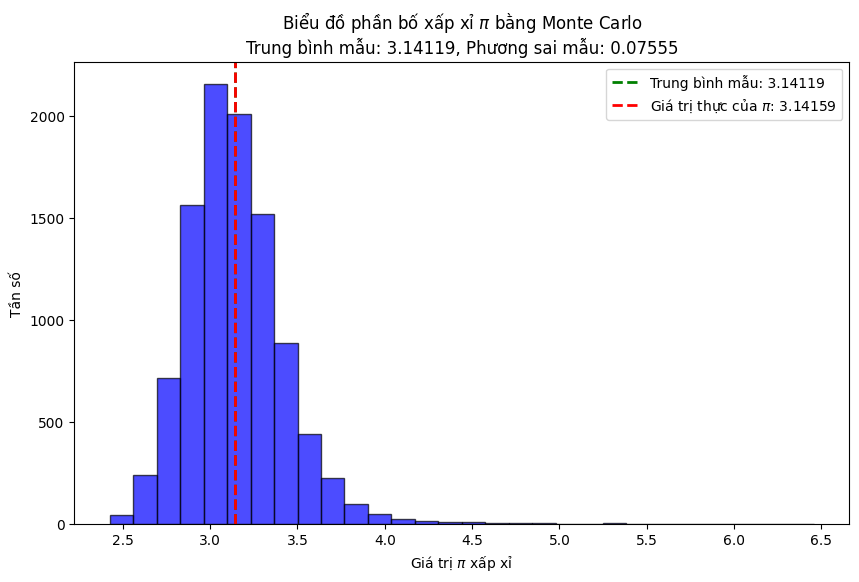

In [20]:
pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = approx_pi_IS(r = 100, N = 500),
    tqdm_desc = 'Thực hiện xấp xỉ π bằng Monte Carlo',
    var_name = '$\\pi$',
    true_value = np.pi,
    method_name = 'Monte Carlo',
    num_trials = 10000
)

## So sánh kết quả:

`TODO: Học viên thay thế dòng này bằng nhận xét của mình`

# Bài tập 4

Hãy thiết kế một phân phối $Q^*$ (bao gồm pdf và sampler) có thể xấp xỉ (bằng Importance Sampling) $\pi$ tốt hơn khi xấp xỉ bằng Monte Carlo ít nhất 2 lần:

$$
    Var_{q^*}\left[f(x)\frac{q(x)}{q^*(x)}\right] \le \frac{1}{2} Var_{q}\left[f(x)\right]
$$

<div style='background-color: #ffcccc; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h3 style='margin: 0; color: red;'>❗ Cảnh báo: Hạn chế sử dụng hằng số siêu việt</h2>
    <p>Vì bạn đang thực hiện phép xấp xỉ <b>π</b>, việc sử dụng hằng số π trong phân phối <b>Q<sup>*</sup></b> là không được phép.</p>
    <p>Nếu bạn sử dụng các <b>hằng số siêu việt</b> (<i>transcendental constants</i>), kết quả bài tập này sẽ bị hủy.</p>
    <p>Tham khảo về số siêu việt: <a href="https://vi.wikipedia.org/wiki/S%E1%BB%91_si%C3%AAu_vi%E1%BB%87t" target="_blank">Wikipedia - Số siêu việt</a></p>
</div>


In [26]:
def better_sampling_IS(r: float) -> Callable[[], tuple[float, float]]:


    def sampler():
        # Sample radius uniformly from [0, r] with sqrt to ensure uniform area distribution
        radius = r * math.sqrt(random.uniform(0, 1))
        angle = random.uniform(0, 2 * 3.1416)  # approximate pi
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        return (x, y)



    return sampler

In [27]:
def better_pdf_IS(r: float) -> Callable[[tuple[float, float]], float]:

    def f(p: tuple[float, float]) -> float:

        x, y = p
        if x**2 + y**2 <= r**2:
            # approximate area of circle using pi ≈ 3.1416
            return 1 / (3.1416 * r**2)
        else:
            return 0.0


    return f

In [28]:
def better_approx_pi_IS(r: float, N: int) -> float:
    """Hàm xấp xỉ số pi bằng Importance Sampling"""

    def approx_func() -> float:
        return 4 * ImportanceSampling(
            q_star_sampler = better_sampling_IS(r = r),
            q = in_square_pdf(r = r),
            q_star = better_pdf_IS(r = r),
            f = is_in_circle(r = r),
            N = N
        )

    return approx_func

Thực hiện xấp xỉ π bằng Importance Sampling: 100%|██████████| 10000/10000 [00:02<00:00, 3652.23it/s]


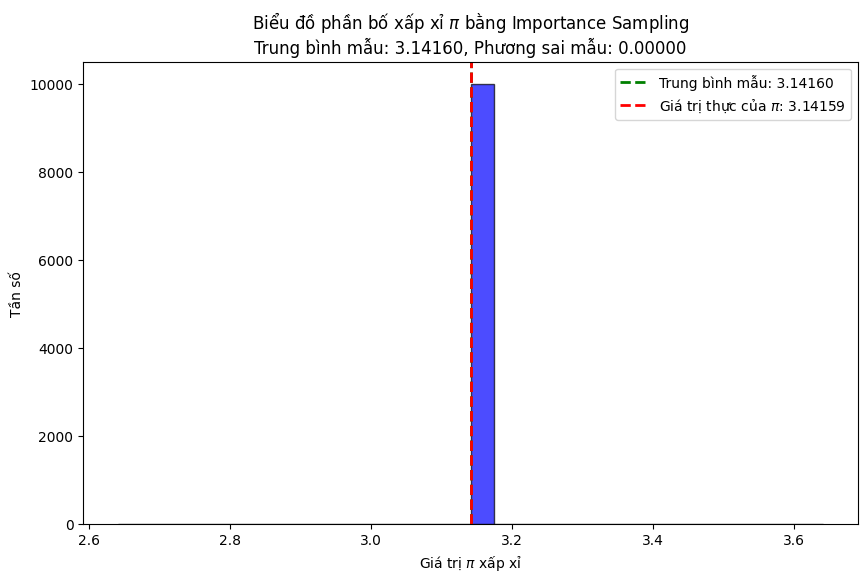

In [29]:
pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = better_approx_pi_IS(r = 100, N = 500),
    tqdm_desc = 'Thực hiện xấp xỉ π bằng Importance Sampling',
    var_name = '$\\pi$',
    true_value = np.pi,
    method_name = 'Importance Sampling',
    num_trials = 10000
)

# Chấm điểm

In [30]:
pima_grader.grade_all(
    sample_needle,
    is_lie_across,
    ImportanceSampling,
    in_square_pdf,
    pdf_IS,
    better_sampling_IS,
    better_pdf_IS,
    is_logging=True
)

Grading problem 1: 100%|██████████| 10000/10000 [00:00<00:00, 20231.49trial/s]


	Success rate: 0.9484
	Number of success: 9484
	Number of trials: 10000
	Alpha: 0.05
	N: 100


Grading problem 3: 100%|██████████| 10000/10000 [00:00<00:00, 17850.05trial/s]


	Mean: 3.1316
	Number of trials: 10000
	N: 100
	Score: 1.0000


Grading problem 4: 100%|██████████| 10000/10000 [00:00<00:00, 18954.29trial/s]


	Variance of q_star: 0.0000
	Variance of q: 0.0270
	Number of trials: 10000
	Score: 1.0000
	N: 100


Bài 1,100%
Bài 2,Bài tập không chấm
Bài 3,100%
Bài 4,100%
Tổng điểm,🎯 100.00%
